In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "../data/datos_act3.xlsx"
data = pd.read_excel(data)
data

,Corriente (A),ΔΘ (rad),error Corriente A),error ΔΘ (rad)
0,-2.0,-0.89,0.01,0.005
1,-1.8,-0.84,0.01,0.005
2,-1.6,-0.79,0.01,0.005
3,-1.4,-0.73,0.01,0.005
4,-1.2,-0.65,0.01,0.005
5,-1.0,-0.57,0.01,0.005
6,-0.8,-0.49,0.01,0.005
7,-0.6,-0.37,0.01,0.005
8,-0.4,-0.27,0.01,0.005
9,-0.2,-0.13,0.01,0.005


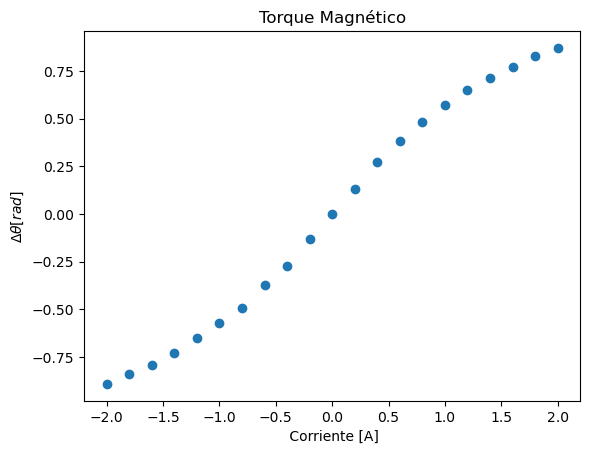

In [3]:
I= data['Corriente (A)']
Theta=data['ΔΘ (rad)']

Ierr= data['error Corriente A)']
Thetaerr= data['error ΔΘ (rad)']


plt.scatter(I, Theta)
plt.title("Torque Magnético")
plt.xlabel(" Corriente [A]")
plt.ylabel(r"$\Delta \theta [rad]$")

plt.savefig("act3_img1")

In [4]:
w = 1/(Thetaerr**2)

sum_w = w.sum()
sum_wx = (w*I).sum()
sum_wy = (w*Theta).sum()
sum_wxx = (w*I**2).sum()
sum_wxy = (w*I*Theta).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.49454545454545457
-0.0033333333333331345
0.0009009374626955589
0.0010910894511799618


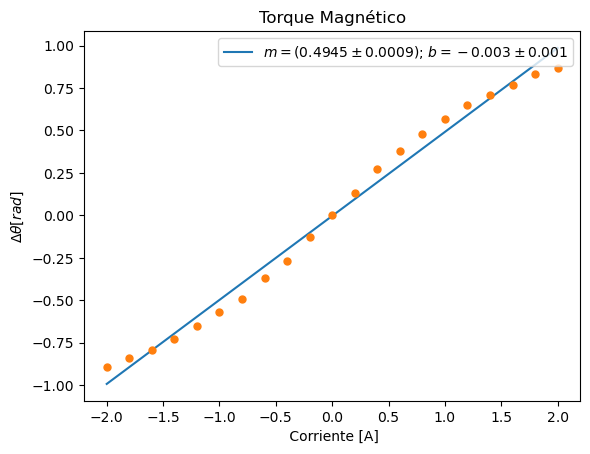

In [5]:
x = np.linspace(-2, 2, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (0.4945\pm 0.0009)$" + "; " + r"$b = -0.003\pm 0.001$")
plt.errorbar(I, Theta, Thetaerr, fmt="o", markersize=5, capsize=1)

plt.title("Torque Magnético")
plt.xlabel(" Corriente [A]")
plt.ylabel(r"$\Delta \theta [rad]$")
plt.legend(loc="upper right")

plt.savefig("act3_img1")

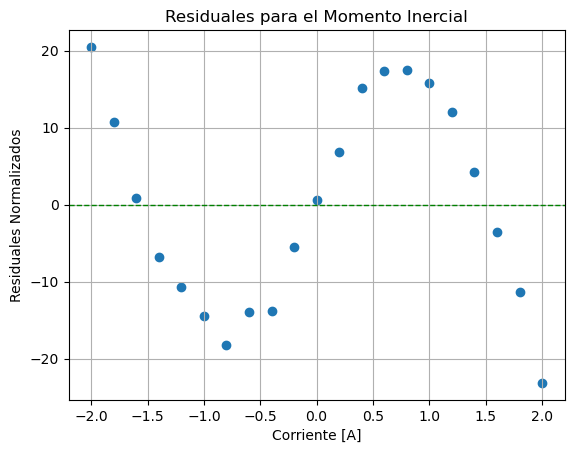

In [6]:
model = m*I+b
res = (Theta - model)/Thetaerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(I, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel("Corriente [A]")
ax2.set_title('Residuales para el Momento Inercial')
ax2.grid()

plt.savefig('act3_img1_res.png', format='png')

In [7]:
I

0    -2.0
1    -1.8
2    -1.6
3    -1.4
4    -1.2
5    -1.0
6    -0.8
7    -0.6
8    -0.4
9    -0.2
10    0.0
11    0.2
12    0.4
13    0.6
14    0.8
15    1.0
16    1.2
17    1.4
18    1.6
19    1.8
20    2.0
Name: Corriente (A), dtype: float64

In [8]:
I_new= I[6:-6]
Ierr_new=Ierr[6:-6]
Theta_new=Theta[6:-6]
Thetaerr_new=Thetaerr[6:-6]
I_new

6    -0.8
7    -0.6
8    -0.4
9    -0.2
10    0.0
11    0.2
12    0.4
13    0.6
14    0.8
Name: Corriente (A), dtype: float64

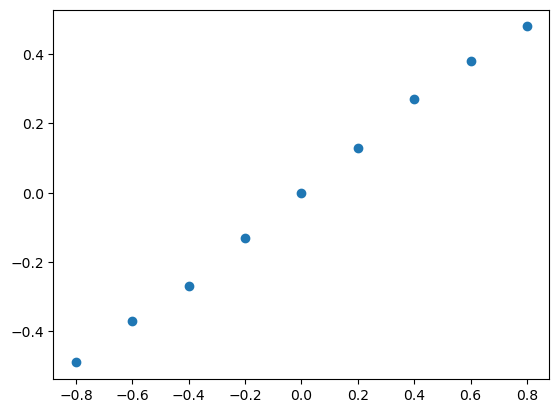

In [9]:
plt.scatter(I_new, Theta_new)

In [10]:
w = 1/(Thetaerr_new**2)

sum_w = w.sum()
sum_wx = (w*I_new).sum()
sum_wy = (w*Theta_new).sum()
sum_wxx = (w*I_new**2).sum()
sum_wxy = (w*I_new*Theta_new).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.6225
2.5263741715914673e-16
0.003227486121839514
0.0016666666666666668


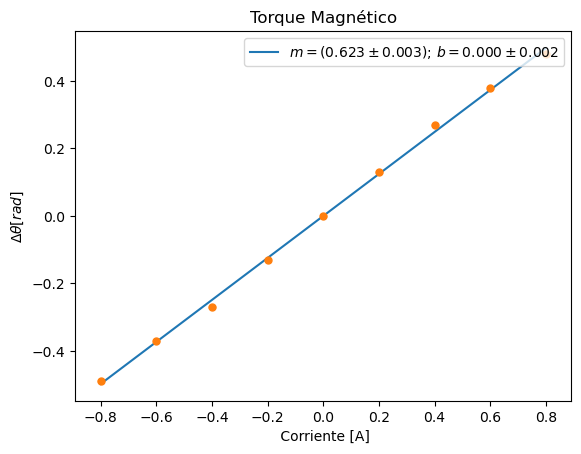

In [11]:
x = np.linspace(-0.8, 0.8, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (0.623\pm 0.003)$" + "; " + r"$b = 0.000\pm 0.002$")
plt.errorbar(I_new, Theta_new, Thetaerr_new, Ierr_new, fmt="o", markersize=5, capsize=1)

plt.title("Torque Magnético")
plt.xlabel(" Corriente [A]")
plt.ylabel(r"$\Delta \theta [rad]$")
plt.legend(loc="upper right")

plt.savefig("act3_img2")

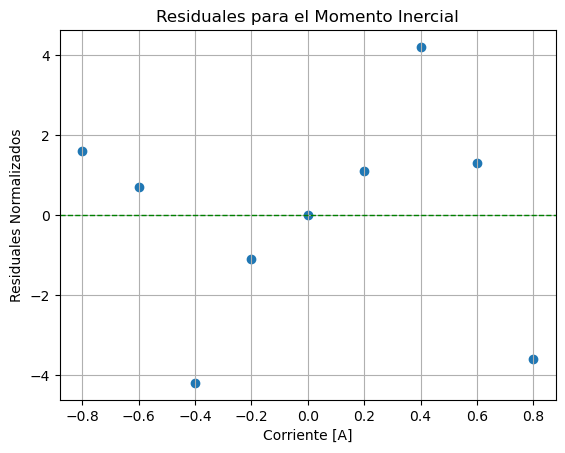

In [12]:
model = m*I_new+b
res = (Theta_new - model)/Thetaerr_new

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(I_new, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel("Corriente [A]")
ax2.set_title('Residuales para el Momento Inercial')
ax2.grid()

plt.savefig('act3_img2_res.png', format='png')

In [35]:
K=3234e-6
Kte=0.021541839875685132

mu=Kte*m/K
mu

4.146504428761285